# Vinhos

In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

In [2]:
uri = 'https://raw.githubusercontent.com/alura-cursos/Clustering/Aula-1.-An%C3%A1lise-Explorat%C3%B3ria/Wine.csv'

In [3]:
df = pd.read_csv(uri)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
30,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285,1
113,11.41,0.74,2.50,21.0,88,2.48,2.01,0.42,1.44,3.08,1.10,2.31,434,2
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
82,12.08,1.13,2.51,24.0,78,2.00,1.58,0.40,1.40,2.20,1.31,2.72,630,2
167,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.72,1.75,685,3
69,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718,2
14,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547,1
116,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495,2
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [6]:
df = df.drop('Customer_Segment', axis=1)  # este atributo nao está presente no DF do inicio da aula

In [7]:
df = df.rename(columns = {'Alcohol' : 'Alcool', 'Ash' : 'Po', 'Ash_Alcanity': 'Alcalinidade_po',
                          'Magnesium' : 'Magnesio','Total_Phenols' : 'Total_Fenois',
                          'Nonflavanoid_Phenols':'Fenois_nao_flavalonoides','Color_Intensity':'Intensidade_de_cor'})

In [8]:
df.sample(5)

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline
41,13.41,3.84,2.12,18.8,90,2.45,2.68,0.27,1.48,4.280000,0.91,3.00,1035
111,12.52,2.43,2.17,21.0,88,2.55,2.27,0.26,1.22,2.000000,0.90,2.78,325
97,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.900000,1.23,2.74,428
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.580000,1.13,3.20,830


In [9]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [10]:
matriz_corr = df.corr()

In [11]:
matriz_corr

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline
Alcool,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Po,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinidade_po,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesio,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Fenois,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Fenois_nao_flavalonoides,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Intensidade_de_cor,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


## Matriz de correlação com o biokit

In [12]:
!pip install biokit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

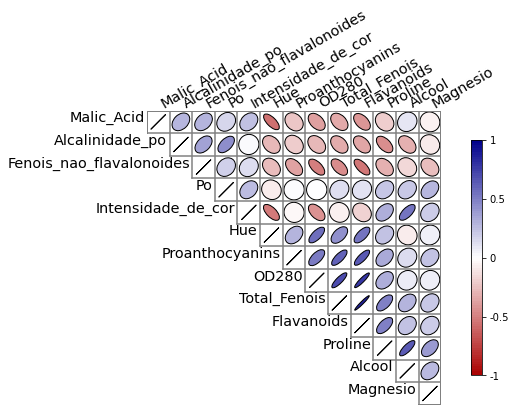

In [14]:
corr_graf = corrplot.Corrplot(matriz_corr)

corr_graf.plot(upper = 'ellipse', fontsize='x-large')

fig = plt.gcf()
fig.set_size_inches(13,8)
fig.show()

O que nós podemos analisar a partir disso aqui? Em azul são os gráficos que são os atributos que tem correlação positiva e em vermelho são aqueles que tem correlação negativa.

O que significa dizer que dois atributos têm correlação positiva? Significa dizer que eles variam da mesma maneira. Como assim? Se um aumenta, o outro também aumenta de maneira semelhante.

E o que significa dizer que eles têm correlação negativa? Significa dizer que eles variam de maneira contrária, se um aumenta o outro diminui.

Quanto mais próximo de uma linha reta esse desenho que nós temos aqui, maior é a nossa correlação, porque a correlação indica o quanto dois atributos ou duas séries variam de maneira proporcional.

Como nós podemos perceber, Malic_Acid com o Malic_Acid é uma linha reta perfeita. Por quê? Porque eles variam da mesma maneira, uma vez que são o mesmo atributo.

Algumas informações importantes que nós podemos extrair daqui são as seguintes: Total_Fenois é bastante correlacionado com Flavanoids. É bastante mesmo, é quase uma linha reta e é correlacionado de maneira positiva.

Isso quer dizer que quando o Total_Fenois aumentar, Flavanoids também aumenta de maneira praticamente proporcional. Isso porque como nós tínhamos visto ao utilizarmos o método describe(), Flavanoids é basicamente boa parte de Total_Fenois.

Uma outra coisa interessante que nós podemos ver, por exemplo, é que a correlação entre Hue e Malic_Acid é uma correlação negativa. Isso quer dizer que quando Hue aumenta Malic_Acid diminui.

Isso é muito bom quando nós queremos remover alguns atributos de informação redundante. Por exemplo: no nosso caso aqui, como Flavanoids é extremamente relacionado com Total_Fenois. Eles têm informação redundante, ou seja, informações que representam a mesma coisa.

## Adicional: Heatmap com Seaborn

In [15]:
import seaborn as sns

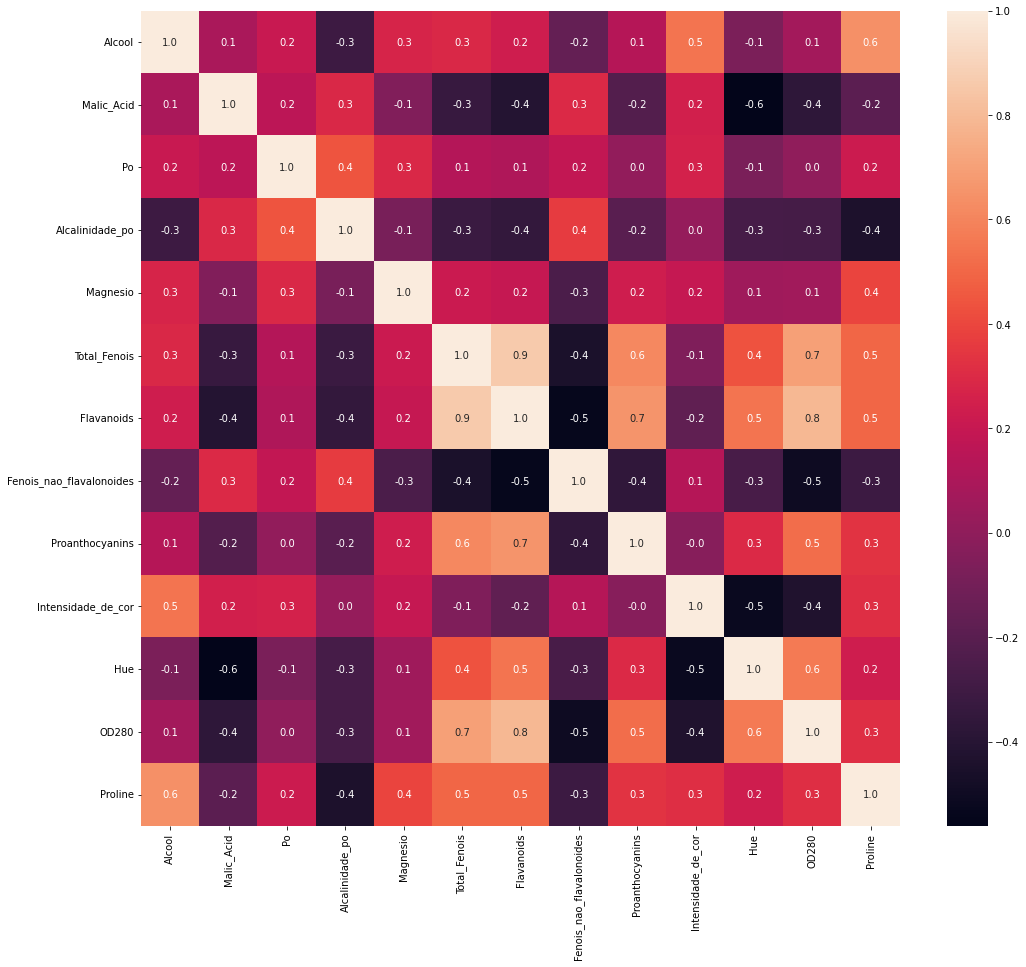

In [16]:
plt.figure(figsize=(17, 15))

sns.heatmap(matriz_corr,
            annot=True,  # para mostrar os valores dentro das caixinhas
            fmt='.1f')  # para mostrar apenas 1 casa decimal

## Normalização Manual

Como nós podemos perceber, os atributos dos nossos dados variam drasticamente.

Para nós resolvermos esse problema vai ser necessário colocarmos os nossos atributos variando na mesma faixa, ou seja, de 0 a 1 e de -1 a 1. Através de um processo chamado normalização.

Nós iremos utilizar uma forma de normalização chamado MinMaxScaler, ou seja, normalização pelo mínimo e pelo máximo.

In [17]:
# for atributo in df.columns:
#   df[atributo] = df[atributo] - min(df[atributo]) / max(df[atributo]) - min(df[atributo])

In [18]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [19]:
df.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Como nós podemos perceber agora todos os nossos atributos estão variando de 0 a 1.

Isso se chama [MinMaxScaler (presente no sklearn)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), porque nós colocamos todos os nossos atributos dentro de 0 e 1 através da subtração do mínimo dividido pelo máximo, menos o mínimo.



## MinMaxScaler com sklearn

In [20]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)  # ele transforma em um array numpy

df = pd.DataFrame(np_df, columns=df.columns)  # devolvemos o array para um DF

In [21]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Desfazendo a transformação (desnormalizando) com sklearn

In [22]:
# ele novamente devolve um array np
np_df = min_max_scaler.inverse_transform(df)

In [23]:
# passando o array para DF
df = pd.DataFrame(np_df, columns=df.columns)

In [24]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Outro exemplo de normalização: Standard Scaler

In [25]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
np_df = standard_scaler.fit_transform(df)
df = pd.DataFrame(np_df, columns = df.columns)
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-3.991813e-17,-8.108370e-16,-3.991813e-17,1.995907e-17,-3.991813e-17,-3.991813e-16,2.794269e-16,-1.596725e-16,9.979533e-18,3.991813e-17,2.794269e-16,-1.596725e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [26]:
np_df = standard_scaler.inverse_transform(df)
df = pd.DataFrame(np_df, columns=df.columns)

In [27]:
df.describe()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Normalizando para darmos continuidade:

In [28]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df)  # ele transforma em um array numpy

df = pd.DataFrame(np_df, columns=df.columns)  # devolvemos o array para um DF

## Introdução ao K-means

In [29]:
from sklearn.cluster import KMeans

In [30]:
agrupador = KMeans(n_clusters=4)
agrupador.fit(df)

KMeans(n_clusters=4)

In [31]:
# lendo os labels
labels = agrupador.labels_
print(labels)

[0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 3 1 1 3 1 1 3 1 3 1 3
 3 1 1 1 1 3 1 3 1 2 3 1 1 1 1 1 1 1 1 3 3 3 1 1 3 3 1 1 3 1 1 1 1 1 1 3 3
 3 1 1 1 1 1 1 2 1 3 3 3 3 3 3 3 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [32]:
# curiosidade: os labels mudam pois são apenas isso: labels
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

[3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 1 0 0 1 0 0 0 0 1 0 3
 1 0 0 0 0 1 0 1 0 2 1 0 0 0 0 0 0 0 0 1 1 3 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 2 0 1 1 1 1 1 1 1 0 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


## Visualizando os Clusters em duas dimensões

In [33]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x = df['Intensidade_de_cor'],
                         y = df['Alcool'],
                         mode = 'markers',
                         marker = dict(color = agrupador.labels_.astype(np.float))))

fig.update_layout(
    title="Clusterizando dados",
    xaxis_title="Intensidade de cor",
    yaxis_title="Alcool"
)

fig.update_layout(title_text='Vinhos por Intensidade de cor e Alcool')

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Como nós podemos perceber, parece que os nossos grupos não ficaram bem separados. Um pouco é porque nós colocamos a vista em 2D, ou seja, nós estamos vendo dois atributos, dos oito possíveis.

Mas além disso, parece que os grupos não ficaram com um formato muito bonito. Vamos variar o valor do k, ou seja, do número de grupos no KMeans, para nós vermos se melhora um pouco. Vamos utilizar ao invés de quatro, três.

## Visualizando os Clusters em duas dimensões para 3 grupos (k = 3)

In [34]:
agrupador = KMeans(n_clusters = 3)
agrupador.fit(df)
labels = agrupador.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 1 2 2 2 2 2 2 1 2 1 2 2 0
 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [35]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = df['Intensidade_de_cor'],
                         y = df['Alcool'],
                         mode = 'markers',
                         marker = dict(color=agrupador.labels_.astype(np.float)),
                         text = labels))

fig.update_layout(
    title="Clusterizando dados",
    xaxis_title="Intensidade de cor",
    yaxis_title="Alcool"
)

fig.update_layout(title_text='Vinhos por Intensidade de cor e Alcool')

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Como nós podemos perceber parece que ficou um pouco melhor organizado, parece que os grupos ficaram mais bem definidos.

## Visualizando os Clusters em 3D

In [36]:
fig = go.Figure()

fig.add_trace(go.Scatter3d(x = df['Intensidade_de_cor'],
                           y = df['Alcool'],
                           z = df['Proline'],
                           mode = 'markers',
                           marker = dict(color = labels.astype(np.float)),
                           text = labels))

fig.update_layout(scene = dict(
    xaxis_title = 'Intensidade de Cor(x)',
    yaxis_title = 'Álcool(y)',
    zaxis_title = 'Prolina(z)'
))

fig.update_layout(title_text='Vinhos por Intensidade de cor(x), Álcool(y) e Prolina(z)')

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



##  Analisando os Clusters em 3 dimensões

### Adicionando o centro dos clusters

In [37]:
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = df.columns
centros.head()

,Alcool,Malic_Acid,Po,Alcalinidade_po,Magnesio,Total_Fenois,Flavanoids,Fenois_nao_flavalonoides,Proanthocyanins,Intensidade_de_cor,Hue,OD280,Proline
0,0.705651,0.248429,0.584904,0.344431,0.410727,0.642114,0.554679,0.300340,0.477272,0.355340,0.477809,0.690386,0.593894
1,0.544689,0.478441,0.560136,0.538332,0.311462,0.244765,0.107135,0.618525,0.228276,0.482640,0.192550,0.160906,0.247400
2,0.311375,0.236899,0.472917,0.499917,0.247721,0.453059,0.382401,0.411747,0.397425,0.147735,0.473512,0.588976,0.156401


In [38]:
fig.add_trace(go.Scatter3d(x = centros['Intensidade_de_cor'],
                           y = centros['Alcool'],
                           z = centros['Proline'],
                           mode = 'markers',
                           marker = dict(color = 'red'),
                           text = [0, 1, 2]))

fig.show()

Como nós podemos perceber eles ficaram em vermelho, ficaram destacados.

O legal é que dá para nós percebermos que, por exemplo, o centro do cluster 1 está bem definido com três atributos, do cluster 2 e do cluster 3 já estão bem próximos, o que mostra que três atributos não são o suficiente para nós visualizamos bem a nossa clusterização, mas já é melhor que dois. Ele dá uma ideia muito legal de como ficou.

Uma coisa muito boa que dá para nós percebermos aqui é a seguinte: como nós podemos perceber, tem alguns pontos que eles ficam em uma região de conflito aqui. Entre, por exemplo, o cluster 2 e o cluster 0. Eles estão bem próximos entre os dois, isso pode indicar que talvez a clusterização com três grupos não tenha sido tão boa, uma vez que os centros ficaram próximos.

Mas mais uma vez, nós estamos visualizando apenas três atributos. Nós só vamos ter uma noção melhor disso quando nós utilizarmos alguma métrica matemática que não seja visual para analisarmos isso.

## Para saber mais: prevendo o clúster de novas amostras

Uma vez realizada a clusterização com o método .fit(), podemos prever como determinada amostra seria classificada através da utilização do método .predict(), conforme o exemplo abaixo.

In [39]:
nova_amostra = [2,0,1.5,27,4,14,38,0.7,10, 1, 4, 16,12]
label_nova_amostra = agrupador.predict([nova_amostra])
print('Nova amostra pertence ao grupo: ', label_nova_amostra)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



Nova amostra pertence ao grupo:  [0]


## Exemplo de Introdução ao DBSCAN

Um outro algoritmo de clusterização bastante conhecido é um algoritmo chamado DBSCAN, que é a sigla em inglês para “agrupamento espacial baseado em densidade de aplicações com ruídos” (Density-Based Spatial Clustering of Applications with Noise).

In [40]:
from sklearn.cluster import DBSCAN

agrupador = DBSCAN(eps=1.31, min_samples=15, metric='manhattan')
agrupador.fit(df)

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

O primeiro parâmetro é o eps = 1.31,, que significa a distância máxima entre dois pontos para que eles possam ser considerados vizinhos ou pertencentes ao mesmo cluster.

Uma outra informação interessante que nós vamos passar é o min_samples, ou seja, o número mínimo de pontos para que eu possa formar um cluster. 

Além disso, eu preciso passar uma métrica de distância, ou seja, uma forma de avaliar a distância entre os pontos. Nesse caso nós iremos passar 'manhattan'.

In [41]:
agrupador.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2])

Com isso, nós podemos perceber bastante coisas interessantes aqui. Primeira: DBSCAN atribui um label chamado -1, ou seja, ele cria um grupo -1. O que significa esse -1? Ele significa que a amostra ou o dado foi classificado como ruído. Por quê?

Porque o DBSCAN é feio para aplicações com ruído, ele considera que qualquer ponto que não esteja dentro dessa distância de 1.31, que é a máxima dos grupos, ele considera que isso é um ruído.

In [42]:
np.unique(agrupador.labels_)

array([-1,  0,  1,  2])

Quando nós utilizamos isso, percebemos que temos -1, 0, 1 e 2. É muito interessante que diferentemente do KMeans nós não passamos o número de cluster, o algoritmo automaticamente nos definiu quantos grupos ele acha que são necessários, respeitando essas duas regras que nós colocamos: eps, que é a distância máxima entre dois pontos, e o min_samples, que é 15, que é o número mínimo de amostras para um grupo.

Uma grande dificuldade do DBSCAN, muitas vezes é definir o eps e min_samples, porque varia bastante de acordo com a densidade dos dados.

## Introdução ao DBSCAN: Teoria

O interessante desse algoritmo é que ele é baseado em regiões de alta densidade, ou seja, sempre que eu tiver uma região com muitos pontos, dado algumas condições, eu considero aquilo como cluster ou um grupo.

O problema que ele se propõe a resolver é o seguinte: tendo um conjunto de ponto C, ou seja, todos os nossos vinhos. Desejamos agrupar os N pontos desse conjunto, ou seja, os 173 dados de vinhos em grupos de densidade específica.

Por que utilizar? O K-means não funciona bem quando os nossos clusters não têm simetria radial, ou seja, quando não dá para nós separarmos ele com um círculo/esfera.

Na figura a seguir nós podemos perceber que esses dois clusters não podem ser separados por um círculo/esfera, com isso o K-means acaba classificando isso erroneamente:

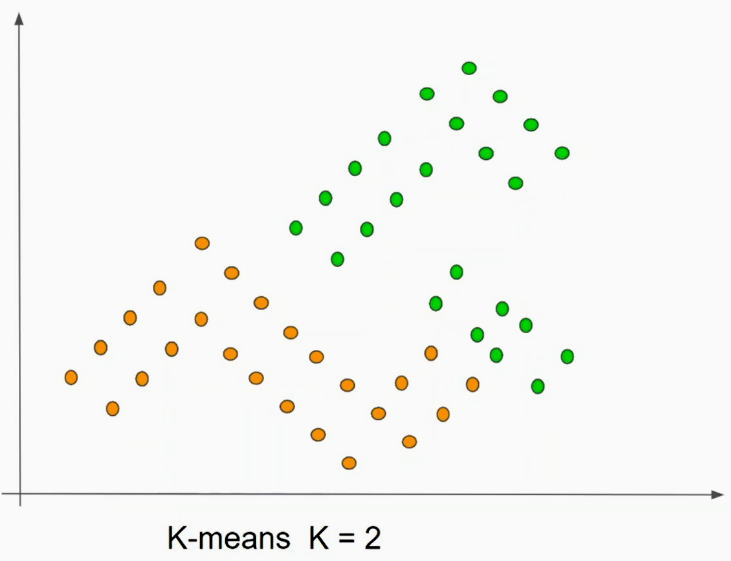

Como nós podemos perceber, esses dados em verde na parte inferior, deveriam pertencer ao cluster laranja e não ao cluster verde.

Nesse contexto, o que o DBSCAN faz de diferente? Primeiro ele define uma distância mínima para que os pontos sejam considerados vizinhos, essa distância é chamada de eps (epsilon). No nosso caso a seguir, ela é 1. Além disso, ele define o número mínimo de pontos dentro de um grupo para que isso seja considerado um cluster real, no caso a seguir, 3.

Ele inicializa em uma amostra aleatória, verifica todos os vizinhos dessa amostra e vai fazendo isso até que ele encontre uma amostra que não tenha mais vizinhos, ou seja, até ele não possa mais expandir.

Se ele for maior que min_points, ele declara que isso é um cluster válido. Depois disso ele começa em outra bolinha aleatória e repete o mesmo processo. Como nós podemos perceber aqui, até o momento que ele não encontra uma amostra que não possui mais vizinhos.

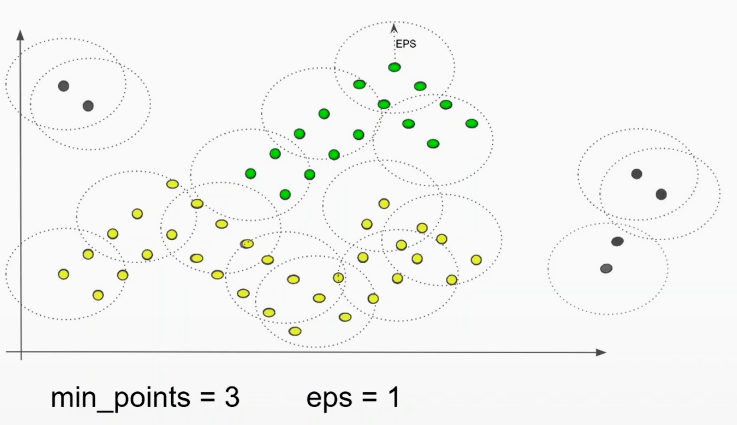

Depois que nós vimos esses dois clusters (verde e amarelo), nós vemos ali dois pontos pretos. Eles são vizinhos, mas são menores que min_points=3. Provavelmente eles são ruídos, nessa circunstância o algoritmo classifica eles como ruído.

Qual é o objetivo do algoritmo? É fazer com que cada grupo tenha pelo menos um número mínimo ou a densidade mínima, que aquele min_samples de pontos vizinhos, considerando como condição de vizinhança uma distância menor ou igual a eps, que é o epsilon.

Por que utilizarmos? Mais uma vez, o caminho do KMeans não costuma apresentar um bom resultado quando há ruídos e grupos de simetria não radial.

Quais são as vantagens do DBSCAN? Ele é robusto a outliers, ou seja, ele é robusto a ruído. Ele pode detectar qualquer tipo de forma de cluster. O custo computacional dele não é tão alto e ele é o segundo algoritmo de clusterização mais utilizado, ou seja, ele é muito popular.

Quais são as desvantagens? Ele não funciona bem com dados de alta dimensionalidade. Assim como no KMeans, quando nós temos muitos atributos, quinze, vinte, às vezes trinta atributos, ele não costuma funcionar tão bem. Por quê? Porque as métricas de distância acabam perdendo um pouco de sentido.

Ele não consegue identificar clusters de várias densidades. Por quê? Porque o min_samples é fixo e o eps também.

Outra coisa é que a parametrização de eps e min_samples não são sempre tão fáceis. Você tem que verificar como os seus dados estão distribuídos para você ver quais seriam os valores razoáveis.

## Variando os parâmetros do DBSCAN

Vamos analisar agora como a clusterização, o agrupamento realizado pelo DBSCAN, é sensível aos parâmetros do próprio modelo.

In [43]:
agrupador = DBSCAN(eps = 0.10, min_samples = 15, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

quando nós utilizamos um valor muito pequeno de eps nós falamos que os vizinhos eram só as amostras que estivessem muito proximas e provavelmente nós temos poucas amostras próximas desse jeito.

Se nessa corrente que o DBSCAN formou, eu tiver pelo menos quinze elos eu tenho um cluster. No nosso caso aqui, nós não formamos uma corrente com pelo menos quinze elos, portanto, todas as nossas amostras foram consideradas ruídos.

Se nós aumentarmos o eps para 10, um valor bem grande, todas as nossas amostras acabam sendo consideradas do mesmo cluster, formando uma corrente gigantesca com todos os nossos dados, em apenas um único cluster.

In [44]:
agrupador = DBSCAN(eps = 10, min_samples = 15, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Vamos deixar o eps = 1.5, que é um valor onde nós vamos ter dois clusters, mais o ruído. Cluster 0, cluster 1 e o ruído em -1.

vamos agora variar o min_samples para 30 (bem grande) e ver o que acontece...

In [45]:
agrupador = DBSCAN(eps = 1.5, min_samples = 30, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

Repare que nós só tivemos apenas um cluster e um monte de ruídos. Isso acontece pq min_samples é o número mínimo de elos que eu preciso em uma corrente para fazer com que elas sejam consideradas um cluster, ou seja, durante parte de expansão do DBSCAN, eu preciso de pelo menos trinta amostras que estejam ligadas entre elas para formar um cluster.

Vamos jogar o min_samples para 80 e avaliar:

In [46]:
agrupador = DBSCAN(eps = 1.5, min_samples = 80, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1])

Todas as nossas amostras foram consideradas ruído pois para eu formar um cluster, eu preciso de uma corrente com muitos elos e nós não temos tantos elos assim.

Agora experimentando um valor muito pequeno em min_samples = 1:

In [47]:
agrupador = DBSCAN(eps = 1.5, min_samples = 1, metric = 'manhattan')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  3,  0,
        0,  4,  0,  5,  0,  6,  0,  0,  0,  0,  7,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  9,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 10,  0, 11,  0,  0, 12,  0,  0,  0,
        0,  0, 13,  0, 14, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, 16, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0])

Acabamos tendo um número gigantesco de clusters (17 ao todo), pois para eu considerar um cluster, basta apenas uma amostra, ou seja, durante a expansão do algoritmo apenas um elo eu já pode-se considerar um cluster.

Também nao forma ruído por este mesmo motivo. Todos os pontos outliers, sozinhos, serão um cluster.

### Agora vamos experimentar com o parametro 'metric':

A distância de 'manhattan', basicamente é uma distância que vai sempre seguindo em linha reta, linhas horizontais e linhas verticais.

Mudando para distância euclidiana vamos ver o que acontece:

In [48]:
agrupador = DBSCAN(eps = 1.5, min_samples = 15, metric = 'euclidean')
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Voltando os parametros eps e min_samples para os que percebemos ser o mais interessante, a diferença para distancia euclideana já altera drasticamente o resultado.

O eps é sempre calculado em cima de uma métrica de distância. A métrica de distância é extremamente importante na hora da minha clusterização.

Repare que como todos os nossos pontos ficaram no mesmo cluster, significa que o nosso eps está muito grande.

Se colocarmos eps = 0.5, agora sim temos dois clusters e ruído. Uma situação um pouco semelhante a que nós estávamos antes.

In [49]:
agrupador = DBSCAN(eps = 0.5, min_samples = 15, metric = 'euclidean')
agrupador.fit(df)
agrupador.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,
       -1, -1, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1,  0,  0,  0,  1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0, -1, -1,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1,
        0,  0, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1,  1,  1, -1, -1,  1,
       -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1,
        1, -1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1])

O que nós podemos concluir? O eps e o min_samples variam de maneira inversamente proporcional, ou seja, o efeito que eu causo aumentando o eps é o mesmo efeito que eu causo diminuindo o min_samples. O efeito que eu causo aumentando o min_samples é o mesmo efeito que eu causo diminuindo o eps.

Existem outras métricas de distância, além das apresentadas aqui, como distância cosseno e outras. Para alterar no algoritmo, basta fazer como na aula, alterar o parâmetro metric. As métricas de distância permitidas são:

Do scikit-learn: [‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’]
Do scipy.spatial.distance: [‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’]
Para mais referências de métricas de distância, também podemos consultar a documentação oficial da biblioteca sklearn.

##  Introdução ao Mean-Shift

existe um método de clusterização chamado MeanShift, pelo qual você, geralmente, não precisa parametrizar nada (não-paramétrico). Vamos conferir?

In [50]:
from sklearn.cluster import MeanShift

In [51]:
from sklearn.cluster import estimate_bandwidth

BW = estimate_bandwidth(df, quantile=0.2)
print(BW)

0.7043768552127612


In [52]:
agrupador = MeanShift(bandwidth = BW)
agrupador.fit(df)
agrupador.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 3, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

O Mean-Shift é um algoritmo de clusterização que diferentemente do KMeans, ele não requer especificação do número de cluster e diferentemente do DBSCAN você não precisa parametrizar coisas como eps, mas igualmente ao DBSCAN, ele procura por regiões de alta densidade e afirma que nessas regiões de alta densidade existem clusters.

O problema que ele se coloca a resolver é o mesmo problema do DBSCAN, tendo um conjunto de ponto C, deseja-se agrupar N pontos desse conjunto em grupos de máxima densidade.

A seguir nós temos um exemplo. Se nós pararmos para pensar, o que acontece? Por que que chama "MeanShift" ou "deslocamento de média"? Porque ele começa com cada ponto sendo um cluster e faz a média dos pontos dentro do mais perto de circunferência que ele cria a cada ponto.

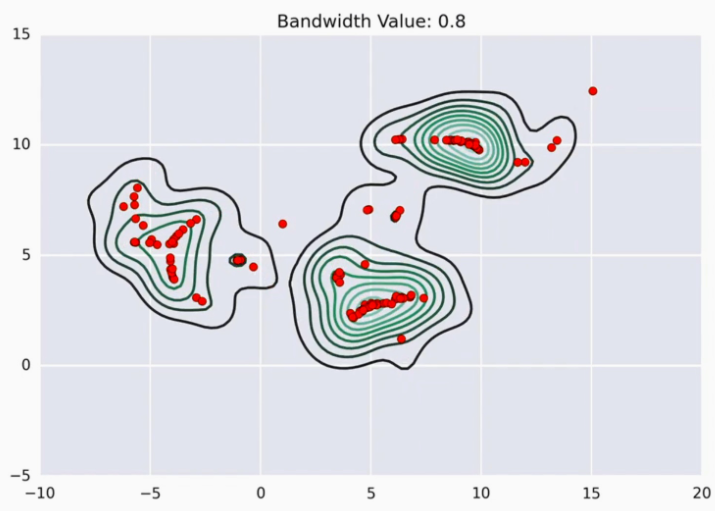

Um único parâmetro que nós podemos mexer nele é a largura de banda, também chamada de bandwidth. Ela basicamente define qual é a região para cada ponto que nós pegamos e que vamos analisar a densidade.

Quanto mais eu aumento o valor de largura de banda, maior a região que eu estou analisando para calcular a densidade de pontos. Com isso, eu acabo tendo um número menor de clusters.

O objetivo do algoritmo é agrupar os pontos de acordo com as regiões de alta densidade.

As vantagens do algoritimo é que ele é robusto aos outliers, ruídos e pontos fora da curva. Ele serve para vários tipos de aplicações, o tipo de aplicação que é muito utilizado para ele é para segmentação de imagem. É um campo que foi bem desenvolvido, esse algoritmo. Aliás, até mesmo para, por exemplo, visão computacional. Ele é bastante utilizado.

Entre as desvantagens são o fato que não funciona bem com dados de alta dimensionalidade pois ele também utiliza de certa forma uma métrica de distância para calcular, assim como os outros algoritmos, e acaba não funcionando muito bem quando a dimensionalidade dos dados é grande (muitos atributos).

A parametrização da largura de banda não é algo tão simples, você tem que estimar mais ou menos a densidade dos pontos e os valores da localização dos pontos baseados, por exemplo, em alguns recursos estatísticos.

E ele é computacionalmente caro, porque todo ponto no início é tratado como um cluster. Se ele tiver, por exemplo, um milhão de pontos - no início eu vou ter um milhão de clusters, eu vou ter que repetir o processo para cada ponto até que ele convirja. Você imagina que o custo computacional desse algoritmo é bem alto.

### Adicionando os clústeres no gráfico

In [53]:
#Criando a figura
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=df['Intensidade_de_cor'],
                           y=df['Alcool'],
                           z=df['Proline'],
                           mode = 'markers',
                           marker = dict(color = agrupador.labels_.astype(np.float)),
                           text = [0, 1, 2]))

#Adicionando o nome aos eixos
fig.update_layout(scene = dict(
    xaxis_title='Intensidade de Cor',
    yaxis_title='Àlcool',
    zaxis_title='Proline'))

#Extraindo os centros
centros = pd.DataFrame(agrupador.cluster_centers_)
centros.columns = df.columns

#Adicionando-os ao gráfico
fig.add_trace(go.Scatter3d(x=centros['Intensidade_de_cor'],
                           y=centros['Alcool'],
                           z=centros['Proline'],
                           mode = 'markers',
                           marker = dict(color = 'red'),
                           text = [0, 1, 2]))

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



## Introdução ao Coeficiente de Silhueta

In [54]:
agrupador = KMeans(n_clusters = 5)
agrupador.fit(df)
labels = agrupador.labels_

In [55]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x = df['Intensidade_de_cor'],
                          y = df['Alcool'],
                          z = df['Proline'],
                          mode = 'markers',
                          marker = dict(color = labels.astype(np.float)),
                          text = labels))

fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Surge nesse contexto uma dúvida: será que esse ponto talvez não deveria pertencer ao cluster rosa?

Qual é a maneira de nós avaliarmos isso? Para nós avaliarmos isso, podemos utilizar uma métrica de coeficiente de silhueta, existem muitas outras, mas esse coeficiente de silhueta é uma ótima métrica. Ela basicamente analisa o quanto os pontos dos nossos clusters estão próximos dos demais pontos do nosso cluster e afastado dos pontos do cluster vizinho.

### Aprofundando no coeficiente de silhueta

O nosso problema é saber como avaliar se a nossa clusterização por distância ficou boa ou não. Por que a clusterização por distância? Porque todos os métodos/modelos que nós utilizamos usam métricas de distância. Eles calculam as distâncias entre os pontos para chegarem no resultado final da clusterização. A ideia é: como nós vamos avaliar se isso ficou bom ou não?

O valor do coeficiente de silhueta é um valor de -1 a 1, onde um valor alto indica que o objeto está bem combinado com seu próprio cluster e mal combinado com os clusters vizinhos. Se a maioria dos objetos tiver um valor alto, a configuração de cluster é apropriada. Se muitos pontos tiverem um valor baixo ou negativo, a configuração de cluster pode ter muitos ou poucos clusters, ou seja, uma configuração de clusters diferente do apresentado.

## Coeficiente de Silhueta K-means

Vamos ver agora como funciona o coeficiente de silhueta para o K-means.

In [56]:
from sklearn.metrics import silhouette_score

Para isso, nós vamos criar uma lista que nós vamos ter dentro dela vários valores de clusters, para os quais nós vamos calcular o coeficiente de silhueta. Relembrando que para o K-means, o parâmetro que nós passamos é sempre o K.

In [57]:
faixa_n_clusters = [i for i in range(2, 10)]
print(faixa_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


agora fazer o nosso loop para que nós possamos testar vários valores de k no K-means e pegarmos o valor de silhueta para cada um, ou seja, nós vamos andar para cada um desses números, primeiro K vai valer 2, depois K vai valer 3, depois K vai valer 4, depois K vai valer 5 e assim por diante.

Vamos instanciar aqui um agrupador que vai ser do tipo K-means, o n_clusters, que nós vamos passar para ele assim como no nosso K. Depois disso, nós vamos pegar os nossos labels = agrupador.fit_predict(df).

Esse fit_predict() nos devolve diretamente os labels.

No caso anterior nós estávamos fazendo primeiro agrupador.fit(df) e depois disso nós fazíamos agrupador.labels_, para pegar os labels.

Nesse caso já estamos pegando os labels diretamente para deixarmos o nosso código um pouco mais enxuto.

Depois disso pegaremos o valor do coeficiente de silhueta. Lembrando que o silhouette_score nos devolve o valor do coeficiente de silhueta médio das nossas amostras. Para o silhouette_score nós passaremos o nosso DataFrame e os labels.

E por ultimo, vamos adicionar o valor na nossa lista de valores_silhueta, para formarmos um gráfico posteriormente.

In [58]:
from sklearn.cluster import KMeans

valores_silhueta = []

for k in faixa_n_clusters:
  agrupador = KMeans(n_clusters=k)
  labels = agrupador.fit_predict(df)
  media_silhueta = silhouette_score(df, labels)
  valores_silhueta.append(media_silhueta)

Gerando o grafico com graph objects:

In [59]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = faixa_n_clusters,
                         y = valores_silhueta,))

fig.update_layout(title = 'Valores de Silhueta Médios',
                  xaxis_title = 'Número de clústeres',
                  yaxis_title = 'Valor médio de silhueta')

fig.show()

Através do gráfico podemos perceber o maior valor de coeficiente de silhueta que nós temos é quando o nosso valor de K, que é o número de clusters, é igual a 3.

In [60]:
valores_silhueta

[0.29872218159747743,
 0.3013463273503232,
 0.2597501412236936,
 0.24401059103741637,
 0.21751151489729462,
 0.1882251717638064,
 0.1349025367526414,
 0.12990375747219476]

## Coeficiente de Silhueta Mean-Shift

O único parâmetro que nós mexemos no MeanShift é o quantile. Para isso, nós criaremos uma faixa_quantil, lembrando que iremos utilizar esse quantile em uma função para calcular o valor do Bandwidth.

In [61]:
# Return evenly spaced numbers over a specified interval:
faixa_quantil = np.linspace(0.02, 0.5, 30)
faixa_quantil

array([0.02      , 0.03655172, 0.05310345, 0.06965517, 0.0862069 ,
       0.10275862, 0.11931034, 0.13586207, 0.15241379, 0.16896552,
       0.18551724, 0.20206897, 0.21862069, 0.23517241, 0.25172414,
       0.26827586, 0.28482759, 0.30137931, 0.31793103, 0.33448276,
       0.35103448, 0.36758621, 0.38413793, 0.40068966, 0.41724138,
       0.4337931 , 0.45034483, 0.46689655, 0.48344828, 0.5       ])

Começaremos criando uma lista para armazenar os valores. Após isto, faremos um loop for, ou seja, para cada valor dentro de faixa_quantil, calcule o bandwidth (estimate_bandwidth).

Feito isso, utilize o bandwidth como argumento e instancie o MeanShift no agrupador.

Devolva os labels direto com o fit_prtedict, e agora vamos calcular o silhouette_score passando nosso DF e nossos labels.

Na sequencia, definimos uma condição if pois não conseguimos calcular o silhouette_score se o numero de clusters for igual ou maior que número de dados, e também nao conseguiremos calcular se a quantidade de labels não for pelo menos 2.

Isso acontece por quê?

Quando vamos calcular os coeficientes de silhueta, nós temos que ter sempre pelo menos dois labels. Se eu só tenho um cluster, não tem como eu calcular a minha similaridade/diferença pois não tenho outro grupo vizinho.

Também temos outro problema quando eu tenho o número de clusters igual ao número de dados. Isso vai fazer com que o coeficiente de silhueta também não possa ser calculado porque eu consigo calcular a minha dissimilaridade (diferença), mas não consigo calcular a minha coesão (O quanto eu estou próximo aos elementos do meu grupo).

Nosso if vai checar se o número de labels é igual a 1 e vai checar também se ele é menor que o número de amostras que nós temos no DataFrame.

In [62]:
valores_silhueta = []
quantil_plot = []

for quantil in faixa_quantil:
  bandwidth = estimate_bandwidth(df, quantile=quantil)
  agrupador = MeanShift(bandwidth = bandwidth)
  labels = agrupador.fit_predict(df)

  if len(np.unique(labels)) < len(df) and len(np.unique(labels)) > 1:
    media_silhueta = silhouette_score(df, labels)
    valores_silhueta.append(media_silhueta)
    quantil_plot.append(quantil)

In [63]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = quantil_plot,
                         y = valores_silhueta))

fig.update_layout(dict(xaxis_title = 'Quantile',
                       yaxis_title='Média Silhueta'))

fig.show()

In [64]:
valores_silhueta

[0.056194254181497504,
 0.11532411471942543,
 0.15888119721063856,
 0.18829779760106358,
 0.08106433788540654,
 0.0701808395501227,
 0.11424295614267561,
 0.10883641713826114,
 0.15058986290091403,
 0.21081904720122663,
 0.22092490313863056,
 0.22036686795562316,
 0.2212837640957227,
 0.25582249060090395,
 0.25582249060090395,
 0.11942349194571159,
 0.26375348680377747]

E aqui nós conseguimos ver com mais clareza o maior valor do quantile, ele é 0.28. Este valor nos retorna um coeficiente de silhueta de 0.26.

É um valor um pouco longe do 1. É um valor ótimo do ponto de vista do MeanShift, mas isso nos indica que talvez o MeanShift não seja o melhor método para agruparmos os nossos dados, uma vez que o valor de coeficiente de silhueta deu um valor bom, mas não foi tão bom assim, pensando que ele poderia chegar até em 1.

## MeanShift, DBSCAN e K-means comparados

In [65]:
from sklearn.cluster import KMeans, MeanShift, DBSCAN, estimate_bandwidth
from sklearn.metrics import silhouette_score

In [66]:
agrupador_kmeans = KMeans(n_clusters = 3)
agrupador_DBSCAN = DBSCAN(eps = 2.1, min_samples = 56, metric = 'manhattan')

BW = estimate_bandwidth(df, quantile = 0.28)
agrupador_meanshift = MeanShift(bandwidth = BW)

labels_kmeans = agrupador_kmeans.fit_predict(df)
labels_DBSCAN = agrupador_DBSCAN.fit_predict(df)
labels_meanshift = agrupador_meanshift.fit_predict(df)

print('Labels KMeans: ', labels_kmeans)
print('Labels DBSCAN: ', labels_DBSCAN)
print('Labels MeanShift: ', labels_meanshift)

Labels KMeans:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 2 0 0 0 0 0 0 2 0 2 0 0 1
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Labels DBSCAN:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0 -1  0
  0 -1  0  0 -1  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
Labels MeanShift:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Olhe só, como nós podemos perceber, o resultado foi bem diferente. O labels_kmeans, como nós indicamos para ele, nos deu três clusters. O labels_dbscan nos deu apenas um cluster e um monte de ruído. O labels_meanshift nos deu um monte de 0 e apenas um cluster.

In [67]:
print('O coeficiente de silhueta do K-Means é: ', silhouette_score(df, labels_kmeans))
print('O coeficiente de silhueta do DBSCAN é: ', silhouette_score(df, labels_DBSCAN))
print('O coeficiente de silhueta do MeanShift é: ', silhouette_score(df, labels_meanshift))

O coeficiente de silhueta do K-Means é:  0.3013463273503232
O coeficiente de silhueta do DBSCAN é:  0.2770638783298968
O coeficiente de silhueta do MeanShift é:  0.26375348680377747


Como nós podemos perceber, o maior valor do coeficiente de silhueta que nós obtivemos foi para o K-means, isso quer dizer que provavelmente o K-means é o melhor método de agrupamento para os nossos dados.

Além disso, isso dá outro insight muito interessante que nós podemos conversar com o nosso chefe: é que três clusters, ou seja, três grupos de vinho produziram o maior coeficiente de silhueta possível, o que quer dizer que provavelmente na prática, esses dados deveriam ser grupados em três clusters.

Existem outros métodos para avaliarmos os tipos de clusterização, mas os coeficientes de silhueta produzem um resultado muito bom e muito conciso. Com ele já dá para garantirmos para o nosso chefe que muito provavelmente esse é o melhor método de clusterização.

Além do K-means, que foi o melhor, nós também utilizamos o DBSCAN e o MeanShift. Eles não deram resultado muito bom, provavelmente porque os nossos dados tinham muitos atributos, ou seja, dimensionalidade deles é muito alta. Esses dois métodos não conseguiram dividir os dados em clusters muito bem definidos, por isso que eles deram um coeficiente de silhueta não tão bom.

Então, o que nós podemos tirar de lição com isso? Sempre que nós formos aplicar alguma coisa relacionada clusterização, nós não devemos utilizar apenas uma técnica, mas várias e depois avaliarmos qual delas produziu o melhor resultado segundo algum tipo de análise, que no nosso caso foi o coeficiente de silhueta. Uma vez analisado isso, você define a melhor técnica e utiliza essa para agrupar os seus dados.

## Para saber mais: definindo os parâmetros do DBSCAN através do coeficiente de Silhueta

Assim como para o K-means e o Mean shift, é possível definir os melhores valores para os parâmetros eps e min_samples. Todavia, como são dois parâmetros, a visualização é um pouco mais difícil. Para vermos como fazer isso, podemos:

In [68]:
#20 valores para cada parâmetro.
faixa_min_samples = [i for i in range(1,100,5)]
faixa_eps = [i/10 for i in range(1,100,1)]

Precisaremos utilizar dois for. Um para variar o min_samples e o outro para variar o faixa_eps.

amos criar um for dentro do outro de modo que para cada valor de min_samples possamos variar toda a faixa de eps.

Outro ponto interessante ao qual devemos atentar é que a silhueta não pode ser calculada quando o número de clústeres é igual a 1 ou igual ao número de dados, no caso 178. No primeiro caso não existem vizinhos para comparar o grau de pertença ao grupo. No segundo caso cada cluster só possui um ponto, então, não é possível calcular a semelhança do mesmo com ele mesmo e com os demais.

Para evitar esses problemas, então, colocaremos um if, que basicamente avaliará se o número de labels é diferente de 1 e de 178. Se sim, ele calculará a silhueta. 

Para contar o número de labels, utilizaremos uma função chamada counter da biblioteca collections, que retorna um array onde a primeira posição é o valor e a segunda é o número de ocorrências ou o número de repetições.

In [69]:
from collections import Counter

O número de objetos se encontra na primeira posição do array retornado pela função.

Assim sendo, devemos fazer Counter(labels)[0], que retornará o número de diferentes valores dentro do counter ou o número de labels diferentes.

In [70]:
valores_silhueta = []
eps_plot = []
min_samples_plot = []

for min_samples in faixa_min_samples:
  for eps in faixa_eps:
    labels = 0
    agrupador = DBSCAN(eps = eps, min_samples = min_samples, metric = 'manhattan')
    agrupador.fit_predict(df)
    labels = agrupador.labels_

    if Counter(labels)[0] < len(df) and Counter(labels)[0] > 1: #porque não é possível calcular
    # silhueta para apenas um cluster ou para número de clústeres igual ao número de dados 
      media_silhueta = silhouette_score(df, labels)
      valores_silhueta.append(media_silhueta)
      eps_plot.append(eps)
      min_samples_plot.append(min_samples)

Para desenhar o gráfico, iremos dessa vez adicionar nome aos eixos. Para fazer isso, utilizaremos o método update layout. Além disso, podemos marcar o ponto no qual o coeficiente de silhueta possui o maior valor, adicionando os atributos marker_line_color="midnightblue" e marker_symbol[‘x’] para marcar um x na cor azul no ponto que dá o maior valor do coeficiente de silhueta.

In [71]:
ind = valores_silhueta.index(max(valores_silhueta))

fig = go.Figure()

fig.add_trace(go.Scatter3d(x=[min_samples_plot[ind]],
                           y = [eps_plot[ind]], z = [max(valores_silhueta)],
                           mode = 'markers',marker_line_color="midnightblue",
                           marker_symbol=['x']))

fig.add_trace(go.Scatter3d(x=min_samples_plot,
                           y = eps_plot, z = valores_silhueta,
                           mode = 'markers',
                           text = labels))

fig.update_layout(scene = dict(xaxis_title='eps',
                               yaxis_title='min_samples',
                               zaxis_title='silhueta'))

fig.show()

O ponto com maior silhueta apresenta os melhores valores para eps e min_samples. Para saber de maneira numérica e não gráfica esses valores, é possível fazer:

In [72]:
# pega o índice do maior valor do coeficiente de silhueta
ind = valores_silhueta.index(max(valores_silhueta))

# printa os valores de eps e min_samples para o maior valor de coeficiente de silhueta encontrado
print(eps_plot[ind])
print(min_samples_plot[ind])

2.1
56


Por fim, o maior valor do coeficiente de silhueta é:

In [73]:
print(max(valores_silhueta))

0.2770638783298968
